In [1]:
import math
from math import exp, sqrt, log
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import scipy
import xlsxwriter

from scipy import stats
import pylab
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson

import sqlite3
from sqlite3 import Error
 
""" create a database connection tool to a SQLite database """
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

if __name__ == '__main__':
    create_connection(r"C:\Users\lione\OneDrive\Dokumente\GitHub\AQM\SQL_DB.db")


2.6.0


1. Alles von SQL wieder importieren
2. Futures mit Close für Data Cleaning
3. Describe von beiden Tabellen machen


In [22]:
#Select Statement to import the SQL Data back into Python:   
conn = sqlite3.connect('SQL_DB.db')
c = conn.cursor()
c.execute("SELECT * FROM MACRO_RAW")
macro_sql_data=c.fetchall()
macro_raw = pd.DataFrame(macro_sql_data,columns=['Macro_Variable', 'DATE', 'Value'])
macro_raw = macro_raw.set_index('DATE')
macro_raw_pivot = macro_raw.pivot(columns='Macro_Variable', values=['Value'])
macro_raw_pivot = macro_raw_pivot.droplevel(level=0, axis=1)

c.execute("SELECT * FROM FUTURES_RAW")
futures_sql_data=c.fetchall()
futures_raw = pd.DataFrame(futures_sql_data,columns=['DATE', 'CLOSE', 'Instrument', 'Return'])
futures_raw = futures_raw.set_index('DATE')
futures_raw_close_pivot = futures_raw.pivot(columns='Instrument', values=['CLOSE']) #ACHTUNG HIER IST CLOSE NICHT RETURN!!
futures_raw_close_pivot = futures_raw_close_pivot.droplevel(level=0, axis=1)

futures_raw_return_pivot = futures_raw.pivot(columns='Instrument', values=['Return']) #ACHTUNG HIER IST RETURN!!
futures_raw_return_pivot = futures_raw_return_pivot.droplevel(level=0, axis=1)

In [19]:
macro_raw_pivot.describe()

Macro_Variable,CHCPIY_ECI,CHJOB_ECI,CHPMI_ECI,CNCPI_ECI,CNPMIB_ECI,CNURUA_ECI,EUHICY_ECI,EUPMI_ECI,EUUNR_ECI,RUCPIY_ECI,RUPMIM_ECI,RUUNR_ECI,USCPI_ECI,USPMI_ECI,USUNR_ECI
count,120.000000,120.00000,120.000000,120.000000,120.00000,52.000000,120.000000,49.000000,120.000000,120.000000,33.000000,120.000000,120.000000,120.000000,120.000000
mean,-0.084167,2.96500,54.200000,2.072500,50.51250,5.186538,1.204167,52.934694,9.708333,6.340000,48.203030,5.241667,0.177500,54.350000,5.711667
std,0.729452,0.34584,6.589041,0.983474,1.59698,0.317483,1.035617,6.465374,1.723909,3.622395,4.202342,0.525738,0.254526,4.152755,1.944662
min,-1.400000,2.30000,40.700000,-0.500000,35.70000,4.800000,-0.600000,33.400000,7.000000,2.200000,31.300000,4.300000,-0.800000,41.600000,3.500000
25%,-0.600000,2.80000,49.200000,1.500000,50.10000,5.000000,0.400000,47.700000,8.100000,3.775000,47.500000,4.900000,0.000000,51.250000,4.200000
50%,-0.100000,3.10000,53.700000,2.000000,50.50000,5.100000,1.200000,53.700000,9.650000,5.800000,49.100000,5.200000,0.200000,54.400000,5.150000
75%,0.600000,3.20000,58.300000,2.500000,51.22500,5.300000,1.900000,58.000000,11.500000,7.300000,50.900000,5.600000,0.300000,57.625000,6.750000
max,1.500000,3.50000,70.000000,5.400000,53.30000,6.200000,5.000000,63.400000,12.200000,16.900000,51.900000,6.400000,0.900000,63.700000,14.700000


Instrument,CLc1,Cc1,GCc1,LCc1,NGLNMc1,NGc1,OJc1,PAc1,PLc1,SIc1,Wc1
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,65.972727,450.522727,1423.401653,124.804132,54.198926,3.064397,135.726860,1150.738430,1112.007438,20.117595,565.995868
std,22.254328,133.158282,240.907383,16.507157,33.657163,0.807724,25.664986,647.639804,261.222126,5.440663,121.885628
min,18.840000,301.500000,1060.300000,90.000000,9.630000,1.640000,94.800000,495.600000,724.400000,13.775000,361.000000
25%,48.520000,358.750000,1240.700000,113.450000,39.500000,2.575000,118.650000,703.000000,908.100000,16.124000,477.000000
50%,60.140000,384.500000,1316.200000,122.075000,49.810000,2.906000,132.950000,819.850000,1001.300000,18.014000,529.750000
75%,88.060000,534.000000,1660.600000,132.925000,60.680000,3.560000,148.350000,1532.000000,1371.100000,23.463000,655.000000
max,107.650000,806.500000,1967.600000,169.500000,251.180000,5.867000,221.950000,2957.700000,1691.100000,34.583000,902.500000


In [23]:
futures_raw_return_pivot.describe()

Instrument,CLc1,Cc1,GCc1,LCc1,NGLNMc1,NGc1,OJc1,PAc1,PLc1,SIc1,Wc1
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,-0.002276,-0.000716,0.001288,0.001020,0.009540,0.001846,-0.001202,0.008903,-0.003104,-0.001484,0.001385
std,0.130546,0.082590,0.042386,0.056496,0.167224,0.121714,0.096164,0.083052,0.062873,0.078962,0.078908
min,-0.781866,-0.308383,-0.129212,-0.163827,-0.414303,-0.450252,-0.234889,-0.260308,-0.174839,-0.193546,-0.208109
25%,-0.057495,-0.037740,-0.025365,-0.026490,-0.074080,-0.058933,-0.060380,-0.031754,-0.043480,-0.053909,-0.056672
50%,0.008843,-0.001432,-0.000174,-0.000086,0.004009,-0.002149,-0.000861,0.024872,-0.004869,-0.009814,0.003019
75%,0.060140,0.038369,0.030713,0.034382,0.074449,0.067967,0.052485,0.056742,0.044977,0.040002,0.043571
max,0.633269,0.271153,0.104223,0.140179,0.676408,0.379753,0.243494,0.222933,0.132332,0.265913,0.253699


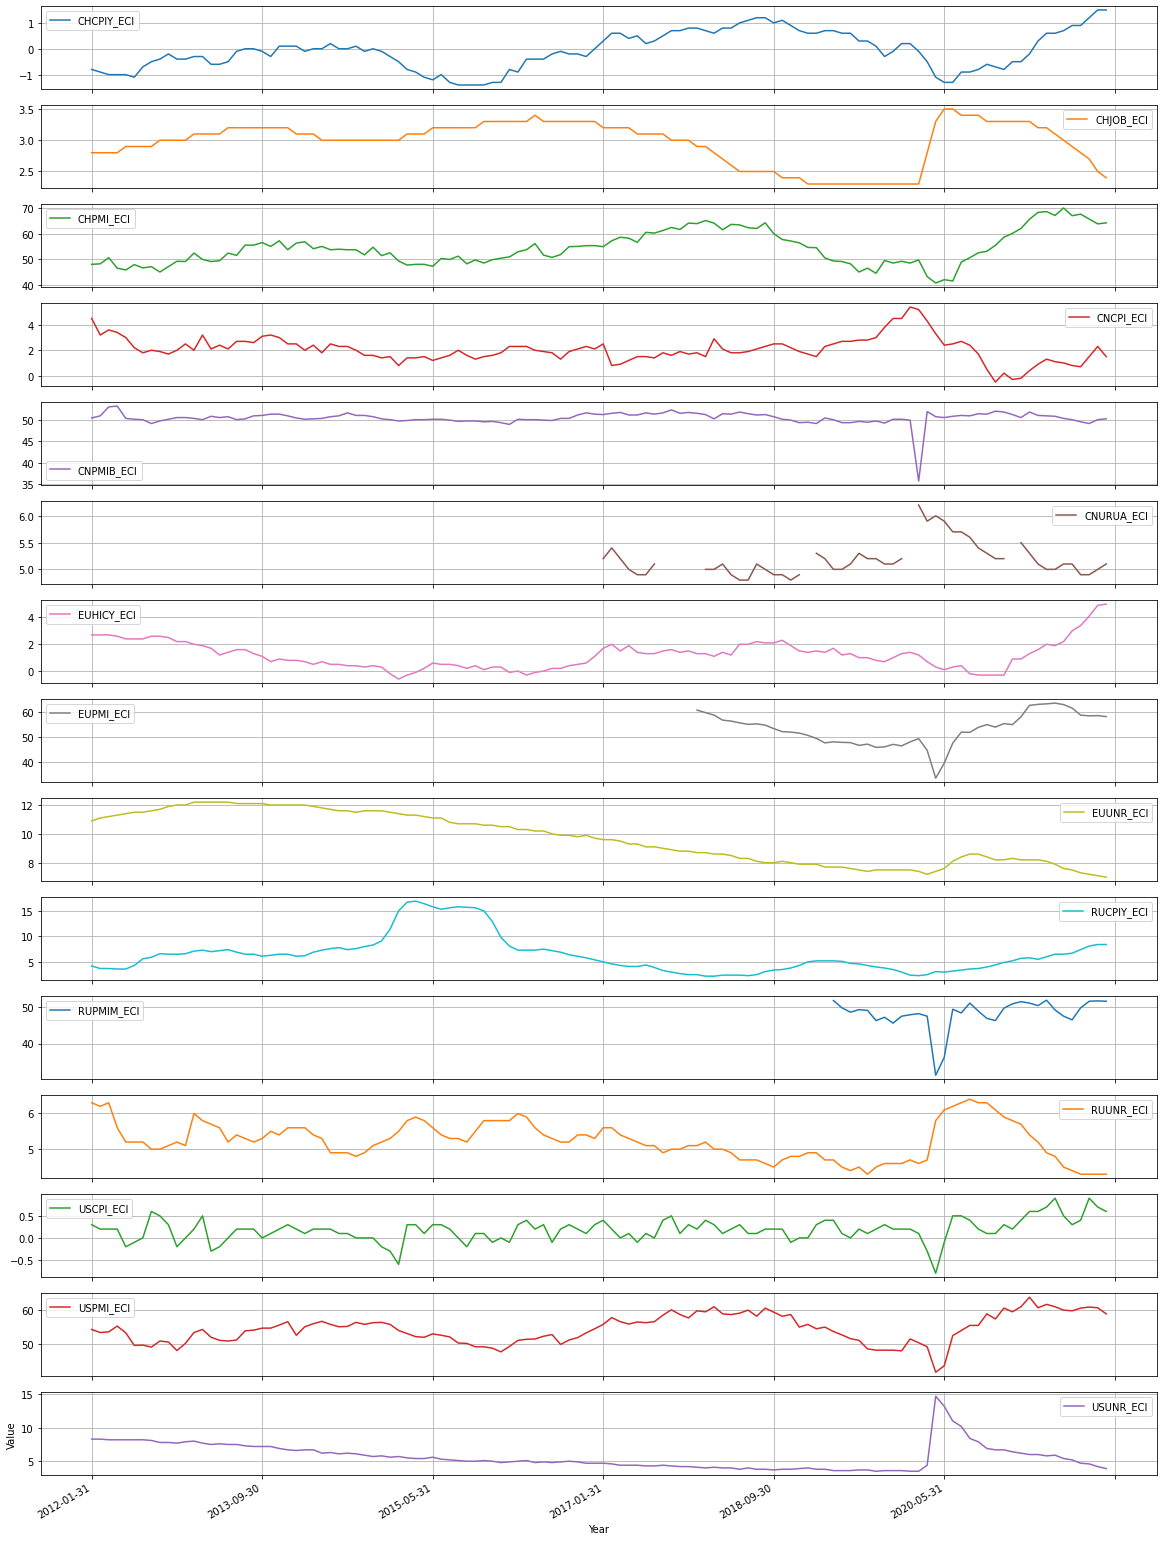

In [30]:
macro_raw_pivot.plot(kind = 'line',
                           legend = True,
                           subplots=True,
                           grid = True,
                           figsize = (20,30)
                           )
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig('Grafiken\Makro Line-Charts', dpi=800)

In [29]:
macro_raw_pivot.isna().sum()

Macro_Variable
CHCPIY_ECI     0
CHJOB_ECI      0
CHPMI_ECI      0
CNCPI_ECI      0
CNPMIB_ECI     0
CNURUA_ECI    68
EUHICY_ECI     0
EUPMI_ECI     71
EUUNR_ECI      0
RUCPIY_ECI     0
RUPMIM_ECI    87
RUUNR_ECI      0
USCPI_ECI      0
USPMI_ECI      0
USUNR_ECI      0
dtype: int64

In Marco-Data some Data is missing in the indicators:
- CNURUA_ECI
- EUPMI_ECI
- RUPMIM_ECI

In [32]:
macro_raw_pivot = macro_raw_pivot.drop(columns=['CNURUA_ECI','EUPMI_ECI','RUPMIM_ECI'], axis=1)
macro_raw_pivot

Macro_Variable,CHCPIY_ECI,CHJOB_ECI,CHPMI_ECI,CNCPI_ECI,CNPMIB_ECI,EUHICY_ECI,EUUNR_ECI,RUCPIY_ECI,RUUNR_ECI,USCPI_ECI,USPMI_ECI,USUNR_ECI
DATE,,,,,,,,,,,,
2012-01-31,-0.8,2.8,48.0,4.5,50.5,2.7,10.9,4.2,6.3,0.3,54.2,8.3
2012-02-29,-0.9,2.8,48.2,3.2,51.0,2.7,11.1,3.7,6.2,0.2,53.3,8.3
2012-03-31,-1.0,2.8,50.6,3.6,53.1,2.7,11.2,3.7,6.3,0.2,53.5,8.2
2012-04-30,-1.0,2.8,46.5,3.4,53.3,2.6,11.3,3.6,5.6,0.2,55.2,8.2
2012-05-31,-1.0,2.9,45.8,3.0,50.4,2.4,11.4,3.6,5.2,-0.2,53.2,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0.9,2.9,67.0,0.8,50.1,3.0,7.5,6.7,4.4,0.3,59.7,5.2
2021-09-30,0.9,2.8,67.6,0.7,49.6,3.4,7.3,7.4,4.3,0.4,60.5,4.7
2021-10-31,1.2,2.7,65.7,1.5,49.2,4.1,7.2,8.1,4.3,0.9,60.8,4.6


In [25]:
futures_raw_close_pivot.describe()

Instrument,CLc1,Cc1,GCc1,LCc1,NGLNMc1,NGc1,OJc1,PAc1,PLc1,SIc1,Wc1
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,65.972727,450.522727,1423.401653,124.804132,54.198926,3.064397,135.726860,1150.738430,1112.007438,20.117595,565.995868
std,22.254328,133.158282,240.907383,16.507157,33.657163,0.807724,25.664986,647.639804,261.222126,5.440663,121.885628
min,18.840000,301.500000,1060.300000,90.000000,9.630000,1.640000,94.800000,495.600000,724.400000,13.775000,361.000000
25%,48.520000,358.750000,1240.700000,113.450000,39.500000,2.575000,118.650000,703.000000,908.100000,16.124000,477.000000
50%,60.140000,384.500000,1316.200000,122.075000,49.810000,2.906000,132.950000,819.850000,1001.300000,18.014000,529.750000
75%,88.060000,534.000000,1660.600000,132.925000,60.680000,3.560000,148.350000,1532.000000,1371.100000,23.463000,655.000000
max,107.650000,806.500000,1967.600000,169.500000,251.180000,5.867000,221.950000,2957.700000,1691.100000,34.583000,902.500000


In [33]:
futures_raw_close_pivot.plot(kind = 'line',
                           legend = True,
                           subplots=True,
                           grid = True,
                           figsize = (20,30)
                           )
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig('Grafiken\Futures Line-Charts', dpi=800)

In [28]:
futures_raw_close_pivot.isna().sum()

Instrument
CLc1       0
Cc1        0
GCc1       0
LCc1       0
NGLNMc1    0
NGc1       0
OJc1       0
PAc1       0
PLc1       0
SIc1       0
Wc1        0
dtype: int64

Loop:

1. Rohdaten von API
2. Rohdaten kontrollieren / Data cleaning
    - Excel vergleichen
    - Describe
    - Bilder erstellen
3. in Log-Return / Veränderung umwandeln
    - Makro Daten -> %-Veränderung
    - Commodity -> Log Returns
4. Log-Returns und Veränderung auf Stationarität testen
    - Dickey Fuller Test / Unit Root
5. Correlation -> ???
6. VIF_Results -> ???
7. OLS
    - adjusted R-Squared
    - F-Statistik
    - Durbin Watson
    - JB
    - Heterodesckity: Breusch Pagan Test
- Multicorrelatiny -> ???
- Autocorrelation


Dickey Fuller Test / Unit Root Test on Commodity Returns:

In [ ]:
#tickers_loop="WIKI/" + data_4['ticker'][0:20] + " - Open"
tickers_loop=Commodities
tickers_loop_list=list(tickers_loop.iloc[:].values)
var_list=tickers_loop_list

In [ ]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Prices (Level)')
    for i in var_list:
        adf_library = adfuller(Commodities[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(Commodities[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library[1],)
    print('____________________________________________','\n')

In [ ]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Absolute Returns (1st Difference)')
    for i in var_list:
        adf_library = adfuller(data_3[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(data_3[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library_d[1])
    print('____________________________________________','\n')

In [ ]:
#Code for VIF Calculation - added a Return-Statement, so that the Results get added in a DataFrame:
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    ttt = pd.DataFrame()
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(formula="y~x", data=x_vars,endog=y, exog=x).fit().rsquared  
        vif=round(1/(1-rsq),2)

        tt = pd.DataFrame()
        tt['XVAR'] = [xvar_names[i]]
        tt['VIF'] = [vif]
        ttt = ttt.append(tt)
    return ttt

In [ ]:
#VIF Calc: Code for 1 column:
input_columns = macro_raw_pivot[['CHCPIY_ECI','CHJOB_ECI','CHPMI_ECI','CNCPI_ECI','CNPMIB_ECI','EUHICY_ECI','EUUNR_ECI','RUCPIY_ECI','RUUNR_ECI','USCPI_ECI','USPMI_ECI','USUNR_ECI']]
xxx = vif_cal(input_data=input_columns, dependent_col='CHCPIY_ECI')
xxx

In [ ]:
#VIF Calc: Code for all Columns - Loop:
input_columns = macro_raw_pivot[['CHCPIY_ECI','CHJOB_ECI','CHPMI_ECI','CNCPI_ECI','CNPMIB_ECI','EUHICY_ECI','EUUNR_ECI','RUCPIY_ECI','RUUNR_ECI','USCPI_ECI','USPMI_ECI','USUNR_ECI']]
VIF_Results = pd.DataFrame()
for col in range(0, len(input_columns.columns)):
    vif = vif_cal(input_data=input_columns, dependent_col=input_columns.columns[col])
    vif = pd.DataFrame(vif)
    vif['dep_col'] = input_columns.columns[col]
    VIF_Results = VIF_Results.append(vif)
VIF_Results = VIF_Results.set_index(['dep_col']).pivot(columns='XVAR', values=['VIF'])
VIF_Results = VIF_Results.droplevel(level=0, axis=1)
VIF_Results.to_excel('VIF_Results.xlsx')
VIF_Results

In [ ]:
#OLS
import statsmodels.api as sm
y = Commodities['CLc1']
x = macro_raw_pivot[['CHCPIY_ECI','CHJOB_ECI','CHPMI_ECI','CNCPI_ECI','CNPMIB_ECI','EUHICY_ECI','EUUNR_ECI','RUCPIY_ECI','RUUNR_ECI','USCPI_ECI','USPMI_ECI','USUNR_ECI']]
x = sm.add_constant(x)
model = sm.OLS(y,x, missing = 'drop') 
results = model.fit(cov_type='HAC', cov_kwds={'maxlags':1})
#print(results.summary())

Loop:

In [ ]:
#Create Table to save all Results from OLS:
import statsmodels.api as sm
Results_OLS = pd.DataFrame()
Top_results_OLS = pd.DataFrame()
VIF_Results = pd.DataFrame()
Breusch_Pagan = pd.DataFrame()

len_comm_col = len(Commodities.columns) 
for col in range(0, len_comm_col):
    
    #OLS Simulation for each Commodity:
    y = Commodities[Commodities.columns[col]]
    x = macro_data[['CHCPIY_ECI','CHJOB_ECI','CHPMI_ECI','CNCPI_ECI','CNPMIB_ECI','EUHICY_ECI','EUUNR_ECI','RUCPIY_ECI','RUUNR_ECI','USCPI_ECI','USPMI_ECI','USUNR_ECI']]
    x = sm.add_constant(x)
    model = sm.OLS(y,x, missing = 'drop') 
    results = model.fit(cov_type='HAC', cov_kwds={'maxlags':1})
    print(results.summary())

    # Breush Pagan Test for Heteroskedastic residuals
    regression1 = pd.DataFrame(y)
    prediction = results.predict()
    regression1['Prediction'] = prediction
    residuals1 = y - prediction
    results_summary  = results.summary()
    #plt.plot(residuals1)
    #plt.title('Residuals')
    #plt.show

    pagan = pd.DataFrame()
    name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    pagan = sms.het_breuschpagan(residuals1, results.model.exog)
    breusch = lzip(name, pagan)
    breusch = pd.DataFrame(breusch)
    breusch['Commodity'] = Commodities.columns[col]
    Breusch_Pagan = Breusch_Pagan.append(breusch)
    Breusch_Pagan

    #Append Results to the Results-Table:
    results_as_html = results_summary.tables[1].as_html()
    results = pd.read_html(results_as_html, header=0, index_col=0)[0]
    results['Commodity'] = Commodities.columns[col]
    Results_OLS = Results_OLS.append(results)
    dfs = {}
    fs = results_summary
    for item in fs.tables[0].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    for item in fs.tables[2].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    dfs = pd.Series(dfs)
    dfs = pd.DataFrame(dfs)
    dfs.reset_index()
    dfs['Commodity'] = Commodities.columns[col]
    Top_results_OLS = Top_results_OLS.append(dfs)
    Top_results_OLS

Results_OLS.to_excel('OLS_Results_Bottom.xlsx')
Top_results_OLS = Top_results_OLS.pivot(columns='Commodity', values=[0])
Top_results_OLS = Top_results_OLS.droplevel(level=0, axis=1)
Top_results_OLS.to_excel('OLS_Results_Top.xlsx')
Breusch_Pagan = Breusch_Pagan.rename(columns={0:'Variable', 1:'Value'})
Breusch_Pagan = Breusch_Pagan.set_index('Variable')
Breusch_Pagan = Breusch_Pagan.pivot(columns='Commodity', values=['Value'])
Breusch_Pagan = Breusch_Pagan.droplevel(level=0, axis=1)
Breusch_Pagan.to_excel('Breusch_Pagan_Results.xlsx')

#print Correlation Matrix -> braucht kein Loop, da überall immer das Gleiche:
corr = macro_data[['CHCPIY_ECI','CHJOB_ECI','CHPMI_ECI','CNCPI_ECI','CNPMIB_ECI','EUHICY_ECI','EUUNR_ECI','RUCPIY_ECI','RUUNR_ECI','USCPI_ECI','USPMI_ECI','USUNR_ECI']].corr()
corr.to_excel('Correlation_Matrix.xlsx')
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);


In [ ]:
Results_OLS

In [ ]:
Top_results_OLS

Diverse Code-Snippets:

In [ ]:
#Jarq Bera Test:
stats.jarque_bera(ReturnS)

#LjungBox autocorrelation:
PF_Ljung = sm.stats.acorr_ljungbox(PF_Returns, lags=10)

#Autocorrelation als Grafik:
data = np.array(PF_Returns)
plt.acorr(data, maxlags=20)
plt.title('Autokorrelation der Portfolio-Renditen')
plt.xlabel('Lag')
plt.ylabel('Autokorrelation')
plt.savefig('Autocorrelation.png', dpi=800)
plt.show()



#ad Fuller
ts.adfuller(df['GDP'])



#Breusch Pagan Test:
statsmodels.stats.diagnostic.het_breuschpagan(results.resid, exog_het = x)




np.dot(var1,var2) vector multiplication

var1.T transposes the vector

np.linalg.inv (var1) inverts the matrix

np.diag (var1) extract a diagonal

Def fct (var1,var2) defines the function ,

OLS_results = library for displaying further

Return OLS_results


df = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)), 
                  columns=['Historic_Rate', 'Overnight', '1M', '3M', '6M'])

fit_d = {}  # This will hold all of the fit results and summaries
for col in [x for x in df.columns if x != 'Historic_Rate']:
    Y = df['Historic_Rate'] - df['Historic_Rate'].shift(1)
    # Need to remove the NaN for fit
    Y = Y[Y.notnull()]

    X = df[col] - df[col].shift(1)
    X = X[X.notnull()]

    X = sm.add_constant(X)  # Add a constant to the fit

    fit_d[col] = sm.OLS(Y,X).fit()

Beispiel Loops:

In [ ]:
#---------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------
#Parameter definieren:
#---------------------------------------------------------------------------------------------------------------
Anzahl_Simulationen = 1000 #1000, 2000, 3000 Simulationen eingeben
Sample_length = 750 #Sample-Grösse für Bootstrap: 250, 500, 750, 1000
alpha = 0.05 #Konfidenzintervall definieren 0.05 und 0.25
Position_VaR = int(Anzahl_Simulationen * alpha) 
#Da unterschiedliche Anzahl Simulationen, dynamisch 5%-Position 
Anzahl_Wiederholungen = 5   
#Konsistenz der Berechnung überprüfen, indem alles 5-Mal durchgeführt wird.


#---------------------------------------------------------------------------------------------------------------
#Sample-Länge definieren:
#Automatische Adjustierung der Sample-Länge:
#---------------------------------------------------------------------------------------------------------------
Returns2 = Returns.reset_index()
Sample_for_Bootstrap = Returns2[['Novartis', 'LafargeHolcim',
                                 'Logitech', 'Nestle', 'Swiss_Re']]

sample_length_adjustierung = (round((len(Sample_for_Bootstrap)-Sample_length)/(10)))*10 + Sample_length
Returns_for_sample = Returns[:sample_length_adjustierung].reset_index()
Sample_for_Bootstrap = Returns_for_sample[['Novartis', 'LafargeHolcim',
                                           'Logitech', 'Nestle', 'Swiss_Re']]

#---------------------------------------------------------------------------------------------------------------
#Loop 1: Alles 5 Mal ausführen und als Excel & Grafik speichern:
#---------------------------------------------------------------------------------------------------------------
for y in range(0,Anzahl_Wiederholungen):
    BHS = [] #Tabelle mit allen berechneten VaR der BHS-Methode
    CBB = [] #Tabelle mit allen berechneten VaR der CBB-Methode
    Reality = [] #Tabelle für die jeweiligen 10 Tage, welche für das Backtesting benötigt werden
    
    #Dynamisch die Dateinamen für das Excel und der Grafik generieren:
    excel_name = "Simulationen/VaR_Simulation_"+str(alpha)+"_Sim_"+str(Anzahl_Simulationen)+"_length_"+str(Sample_length)+"_V"+str(y+1)+ ".xlsx"
    Bild_name = "Simulationen/VaR_Simulation_"+str(alpha)+"_Sim_"+str(Anzahl_Simulationen)+"_length_"+str(Sample_length)+"_V"+str(y+1)+".png"
    
    #---------------------------------------------------------------------------------------------------------------
    #Loop 2: Rolling-Window-Methode: 750 Tage für die Durchführung des Bootstrappings + 10 Tage für Backtesting:
    #---------------------------------------------------------------------------------------------------------------
    for x in range(0, len(Sample_for_Bootstrap)-Sample_length, 10): 
        Samp = Sample_for_Bootstrap[x:x+Sample_length] 

        #Nächsten 10 Tagen für das Backtesting wählen, in diskrete Portfolio-Renditen umrechnen und speichern:
        T = Sample_for_Bootstrap.iloc[x+Sample_length:x+Sample_length+10]
        Real_Sample = T.sum()
        diskrete_real = Math.e**(Real_Sample)-1 
        diskrete_real = diskrete_real.mean()  
        Reality.append(diskrete_real)
        
        #---------------------------------------------------------------------------------------------------------------
        #Loop 3: 
            #Bootstrap Historical Simulation & Circular Bootstrap anwenden
            #mit n Simulationen & zeitliche Addition der Log-Returns 
            #umrechnen in diskrete Returns und berechnung Mittelwert für Portfolio-Rendite:
        #---------------------------------------------------------------------------------------------------------------

        #---------------------------------------------------------------------------------------------------------------
        #Bootstrap Historical Simulation (BHS): 10 Tage nach Zufall mit Zurücklegen ziehen und dies 1000 mal wiederholen:
        #---------------------------------------------------------------------------------------------------------------
        BHS_VaR = []
        for x in range(0,Anzahl_Simulationen):
            Stichproben = Samp.sample(n=10, replace=True).sum()
            df2 = Math.e**(Stichproben)-1 
            x = df2.mean() 
            BHS_VaR.append([x])   

        #---------------------------------------------------------------------------------------------------------------
        #Circular Block Bootstrap (CBB): 10-Tages-Blöcke mit Circular-Effekt ziehen und dies 1000 mal wiederholen:
        #---------------------------------------------------------------------------------------------------------------
        CBB_VaR = [] 
        for x in range(0,Anzahl_Simulationen):    
            Random_X_from = np.random.randint(0,Sample_length+1)
            Random_X_to = Random_X_from + 10
            Stichproben_CBB = Samp[Random_X_from:Random_X_to]
            
            #-------------------------------------------------------------------------
            #Circular-Effekt: Das Ende des Samples mit dem Anfang verbinden -> über den Rand
            #-------------------------------------------------------------------------
            if Random_X_to > Sample_length: #Überprüfen, ob Block über den Rand geht.
                Random_X_to_Circle = (Random_X_to-Sample_length) #Anzahl fehlende Tage berechnen
                Rest_Circular = Samp[:Random_X_to_Circle] #Fehlende Tage vom Anfang des Samples holen
                Stichproben_CBB = pd.concat([Stichproben_CBB, Rest_Circular]) #Beide Listen zusammenfügen

            Stichproben_CBB.sum()
            Stichproben_CBB = Stichproben_CBB.sum()
            df_CBB = Math.e**(Stichproben_CBB)-1  #Log Renditen in Diskrete Renditen umrechnen
            x_CBB = df_CBB.mean()    #Portfolio Rendite rechnen
            CBB_VaR.append([x_CBB])    #Tabelle mit 1000 Portfolio Renditen

        #---------------------------------------------------------------------------------------------------------------
        #Alle 1000 simulierten Portfolio-Renditen aufsteigend sortieren und der 51 schlechteste als VaR definieren:
        #---------------------------------------------------------------------------------------------------------------
        CBB_VaR.sort()
        PF_Returns_Simulation_CBB = pd.DataFrame(CBB_VaR)
        VaR_CBB = PF_Returns_Simulation_CBB.iloc[Position_VaR]
        CBB.append(VaR_CBB)

        BHS_VaR.sort()
        PF_Returns_Simulation_BHS = pd.DataFrame(BHS_VaR)
        a = PF_Returns_Simulation_BHS.iloc[Position_VaR]
        BHS.append(a)
    
    #---------------------------------------------------------------------------------------------------------------
    #Die berechneten VaRs der beiden Methoden in neue Tabelle speichern & die tatsächliche 10-Tages-Rendite ergänzen:
    #---------------------------------------------------------------------------------------------------------------
    Simulationen = pd.DataFrame(BHS)
    Simulationen = Simulationen.rename(columns={0:'BHS_VaR'})
    Simulationen['CBB_VaR'] = pd.DataFrame(CBB)
    Simulationen = Simulationen.reset_index()
    Simulationen.drop('index', axis=1, inplace=True)
    Simulationen = pd.concat([Simulationen, pd.DataFrame(Reality)], axis=1)
    Simulationen = Simulationen.rename(columns={0:'Reality'})
    
    #---------------------------------------------------------------------------------------------------------------
    #Grafik speichern:
    #---------------------------------------------------------------------------------------------------------------
    Simulationen.plot(figsize=(30,15));
    plt.savefig(Bild_name, dpi=400)
    
    #---------------------------------------------------------------------------------------------------------------
    #Anzahl Exceptions & Exceptions Rate berechnen:
    #---------------------------------------------------------------------------------------------------------------  
    Simulationen['BHS_Exceptions'] = Simulationen.BHS_VaR > Simulationen.Reality
    Simulationen['Anzahl_BHS_Exceptions'] = (Simulationen.BHS_VaR > Simulationen['Reality']).sum()
    Simulationen['BHS_Exception_Rate'] = Simulationen.Anzahl_BHS_Exceptions/(len(Simulationen))
    
    Simulationen['CBB_Exceptions'] = Simulationen.CBB_VaR > Simulationen.Reality
    Simulationen['Anzahl_CBB_Exceptions'] = (Simulationen.CBB_VaR > Simulationen['Reality']).sum()
    Simulationen['CBB_Exception_Rate'] = Simulationen.Anzahl_CBB_Exceptions/(len(Simulationen))
    
    Simulationen.to_excel(excel_name)
    Simulationen

In [ ]:
#-----------------------------------------------------------------------------------------------
#Abgelegte Excels für das Backtesting einlesen:
#-----------------------------------------------------------------------------------------------
Sim = [1000, 2000, 3000]
LL = [250, 500, 750, 1000]
Anzahl_Wiederholungen = 5
path = r'C:\Users\lione\OneDrive\ZHAW\Bachelor-Arbeit\Simulationen'

#-----------------------------------------------------------------------------------------------
#Parameter eingeben: 
#-----------------------------------------------------------------------------------------------
Hypo_alpha = 0.05  #Konfidenzniveau für Hypothesen-Test eingeben !!!!!!!!!!!! 0.25????

#-----------------------------------------------------------------------------------------------
#Abgelegte Excels für das Backtesting mittels Schlaufen einlesen:
#-----------------------------------------------------------------------------------------------
Results = pd.DataFrame()

for S in Sim:
    for L in LL:
        for y in range(0,Anzahl_Wiederholungen):
            
            #-----------------------------------------------------------------------------------------------
            #Alle Excel-Files importieren und als DataFrames speichern:
            #-----------------------------------------------------------------------------------------------
            excel_name = "\VaR_Simulation_Sim_"+str(S)+"_length_"+str(L)+"_V"+str(y+1)+".xlsx" #VaR 95%
            import_name = path + excel_name
            name = "S_"+str(S)+"_L_"+str(L)+"_V"+str(y+1)
            vars()[name] = pd.read_excel(import_name, sep=';', index_col=0).sort_index()
            
            #-----------------------------------------------------------------------------------------------
            #RUNS-TEST:
            #Für jedes File den Runs-Test durchführen und den Z-Score und P-Wert speichern:
            #-----------------------------------------------------------------------------------------------
            vars()[name]['RT_Z_Score_BHS'] = runstest_1samp(vars()[name].BHS_Exceptions, correction=False)[0]
            vars()[name]['RT_P_Value_BHS'] = runstest_1samp(vars()[name].BHS_Exceptions, correction=False)[1]
            vars()[name]['RT_reject_H0_BHS'] = vars()[name]['RT_P_Value_BHS'] <= Hypo_alpha
            
            vars()[name]['RT_Z_Score_CBB'] = runstest_1samp(vars()[name].CBB_Exceptions, correction=False)[0]
            vars()[name]['RT_P_Value_CBB'] = runstest_1samp(vars()[name].CBB_Exceptions, correction=False)[1]
            vars()[name]['RT_reject_H0_CBB'] = vars()[name]['RT_P_Value_CBB'] <= Hypo_alpha
            vars()[name]['Run'] = name
            
            #-----------------------------------------------------------------------------------------------
            #Erste Zeile jedes DataFrames wählen und in neue Tabelle mit allen Resultaten speichern:
            #-----------------------------------------------------------------------------------------------
            First_col = pd.DataFrame(vars()[name].iloc[0])
            First_col = First_col.T
            Results = pd.concat([Results, First_col])

#-----------------------------------------------------------------------------------------------
#Tabelle mit den Resultaten optimieren und als Excel exportieren:
#-----------------------------------------------------------------------------------------------
Results = Results.set_index('Run')
Results = Results.drop(['BHS_VaR','CBB_VaR','Reality','BHS_Exceptions', 'CBB_Exceptions'], axis=1)
Results = Results.rename(columns= 
                             {'Anzahl_BHS_Exceptions' : 'BHS_Exceptions'
                             ,'Anzahl_CBB_Exceptions' : 'CBB_Exceptions'})
Results['Anzahl_Tests'] = Results.BHS_Exceptions / Results.BHS_Exception_Rate
Results.to_excel('Results_95.xlsx')
Results_95 = Results 
Results_95